In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import importlib,utils,optim
importlib.reload(utils)
importlib.reload(optim)

matplotlib.rcParams.update({'font.size': 12})

from optim import *

from utils import *
import scipy
from sklearn.linear_model import LinearRegression

In [2]:
def rates(xi,tau,alpha,beta):
    if alpha<tau+1/2 and beta<xi+1/2:
        return -1-2*beta
    if alpha==tau+1/2 and beta==xi+1/2:
        return -2*(xi+1)
    return 2*(max(alpha-beta-tau,-xi)-1)

begin_idx=100
k=5
niter=200
betas=np.linspace(1,4,20)
coefs=[]
theo_slopes=[rates(3/2,1/2,1/2,b) for b in betas]

for beta  in betas:
    m=np.zeros(niter+1-begin_idx)
    for _ in range(k):
        f=RandomQuadratic(n=1000)
        log,_=jacobi_momentum(f,beta=beta,niter=niter)
        m+=log['grad'][begin_idx:]
    m=m/niter
    
    model=LinearRegression()
    
    logx=np.log(np.arange(begin_idx,niter+1).astype(float))
    model.fit(logx[:,None],np.log(m))
    #plt.plot(np.exp(logx),np.exp(model.predict(logx[:,None])))
    #plt.plot(np.exp(logx),m)
    coefs.append(float(-model.coef_))
    


In [2]:
def rates(xi,tau,alpha,beta):
    if alpha<tau+1/2 and beta<xi+1/2:
        return -1-2*beta
    if alpha==tau+1/2 and beta==xi+1/2:
        return -2*(xi+1)
    return 2*(max(alpha-beta-tau,-xi)-1)

begin_idx=100
k=5
niter=200
betas=np.linspace(1,4,20)
coefs=[]
theo_slopes=[rates(3/2,1/2,1/2,b) for b in betas]

for beta  in betas:
    m=np.zeros(niter+1-begin_idx)
    c=[]
    for _ in range(k):
        f=RandomQuadratic(n=1000)
        log,_=jacobi_momentum(f,beta=beta,niter=niter)
        y=log['grad'][begin_idx:]

        model=LinearRegression()

        logx=np.log(np.arange(begin_idx,niter+1).astype(float))
        model.fit(logx[:,None],np.log(y))
        #plt.plot(np.exp(logx),np.exp(model.predict(logx[:,None])))
        #plt.plot(np.exp(logx),m)
        c.append(float(-model.coef_))
    coefs.append(c)
coefs=np.asarray(coefs)

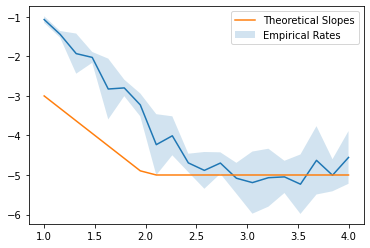

In [19]:
m,s=coefs.mean(1),coefs.std(1)
m=-m
plt.plot(betas,m)
plt.fill_between(betas,m-s,m+s,alpha=0.2,label='Empirical Rates')
plt.plot(betas,theo_slopes,label='Theoretical Slopes')

plt.legend()

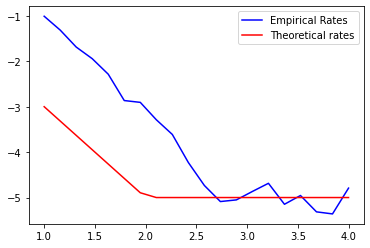

In [4]:
plt.plot(betas,-np.asarray(coefs),c='b',label='Empirical Rates')
plt.plot(betas,np.array(theo_slopes),c='r',label='Theoretical rates')
plt.legend()

##grad norm

In [160]:
f.L

array([0.99475901])

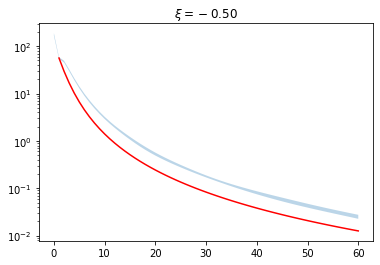

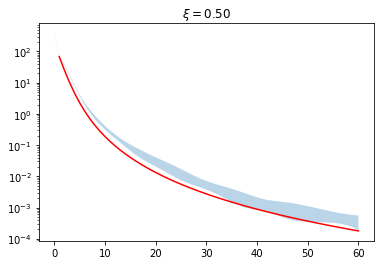

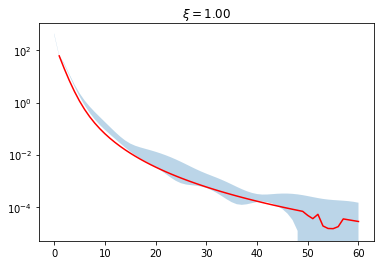

In [37]:
def neste_rates(t,xi,tau,L=1):
    alpha=1/L
    def aux(x):
        l1=scipy.special.eval_legendre(t,np.sqrt(1-alpha*x))
        l2=scipy.special.eval_legendre(t+1,np.sqrt(1-alpha*x))
        p= 2*((1-alpha*x)**((t+1)/2))/(alpha*x*t)*(np.sqrt(1-alpha*x)*l1-l2)
        return p**2*(x**xi)*(L-x)**tau
    return scipy.integrate.quad(aux,0,1)[0]
def besselnator(t,xi,tau):
    def aux(x):
        p=scipy.special.jv(1,t*np.sqrt(x))/(t**2*x)*np.exp(-x*t)
        return p*(x**xi)*(1-x)**tau
    return scipy.integrate.quad(aux,0,1)[0]
niter=60
xis=[-0.5,0.5,1]
for xi in xis:
    logs=[]
    for _ in range(5):
        f=BetaQuadratic(xi=xi,n=1500)
        log,_=nesterov(f,niter=niter,L=f.L)
        logs.append(log['f'])
    theo=np.array([neste_rates(t,xi+1,1/2) for t in np.arange(1,niter+1)])

    logs=np.asarray(logs)
    m,s=logs.mean(0),logs.std(0)
    plt.fill_between(np.arange(niter+1),m-s,m+s,alpha=0.3)
    #theo=gd_rates(np.arange(niter),xi,1,1/2,f.L)
    plt.plot(np.arange(1,niter+1),theo*m[1]/theo[0],c='r')
    #plt.xscale('log')
    plt.yscale('log')
    plt.title(r'$\xi=%.2f$'%xi)
    plt.show()



In [24]:
niter=1000


metric='f'
begin_idx=300
coefs=[]
D=[]
xis=[-0.99,0] #np.linspace(-0.99,0.0.3)
#log,_=jacobi_moment(f,beta=3/2,niter=niter)
for idx_xi,xi in enumerate(xis):
    theo_coeff=xi+2
    logs=[]
    c=[]
    for _ in range(4):
        f=BetaQuadratic(n=1500,xi=xi)
        log,_=nesterov(f,niter=niter,L=f.L)
        y=log[metric][begin_idx:]

        logs.append(log[metric])
        model=LinearRegression()

        logx=np.log(np.arange(begin_idx,niter+1).astype(float))
        model.fit(logx[:,None],np.log(y))
        #plt.plot(np.exp(logx),np.exp(model.predict(logx[:,None])))
        #plt.plot(np.exp(logx),m)
        c.append(float(-model.coef_))
    coefs.append(c)
    logs=np.asarray(logs)
    D.append(logs)


2.02
3.5


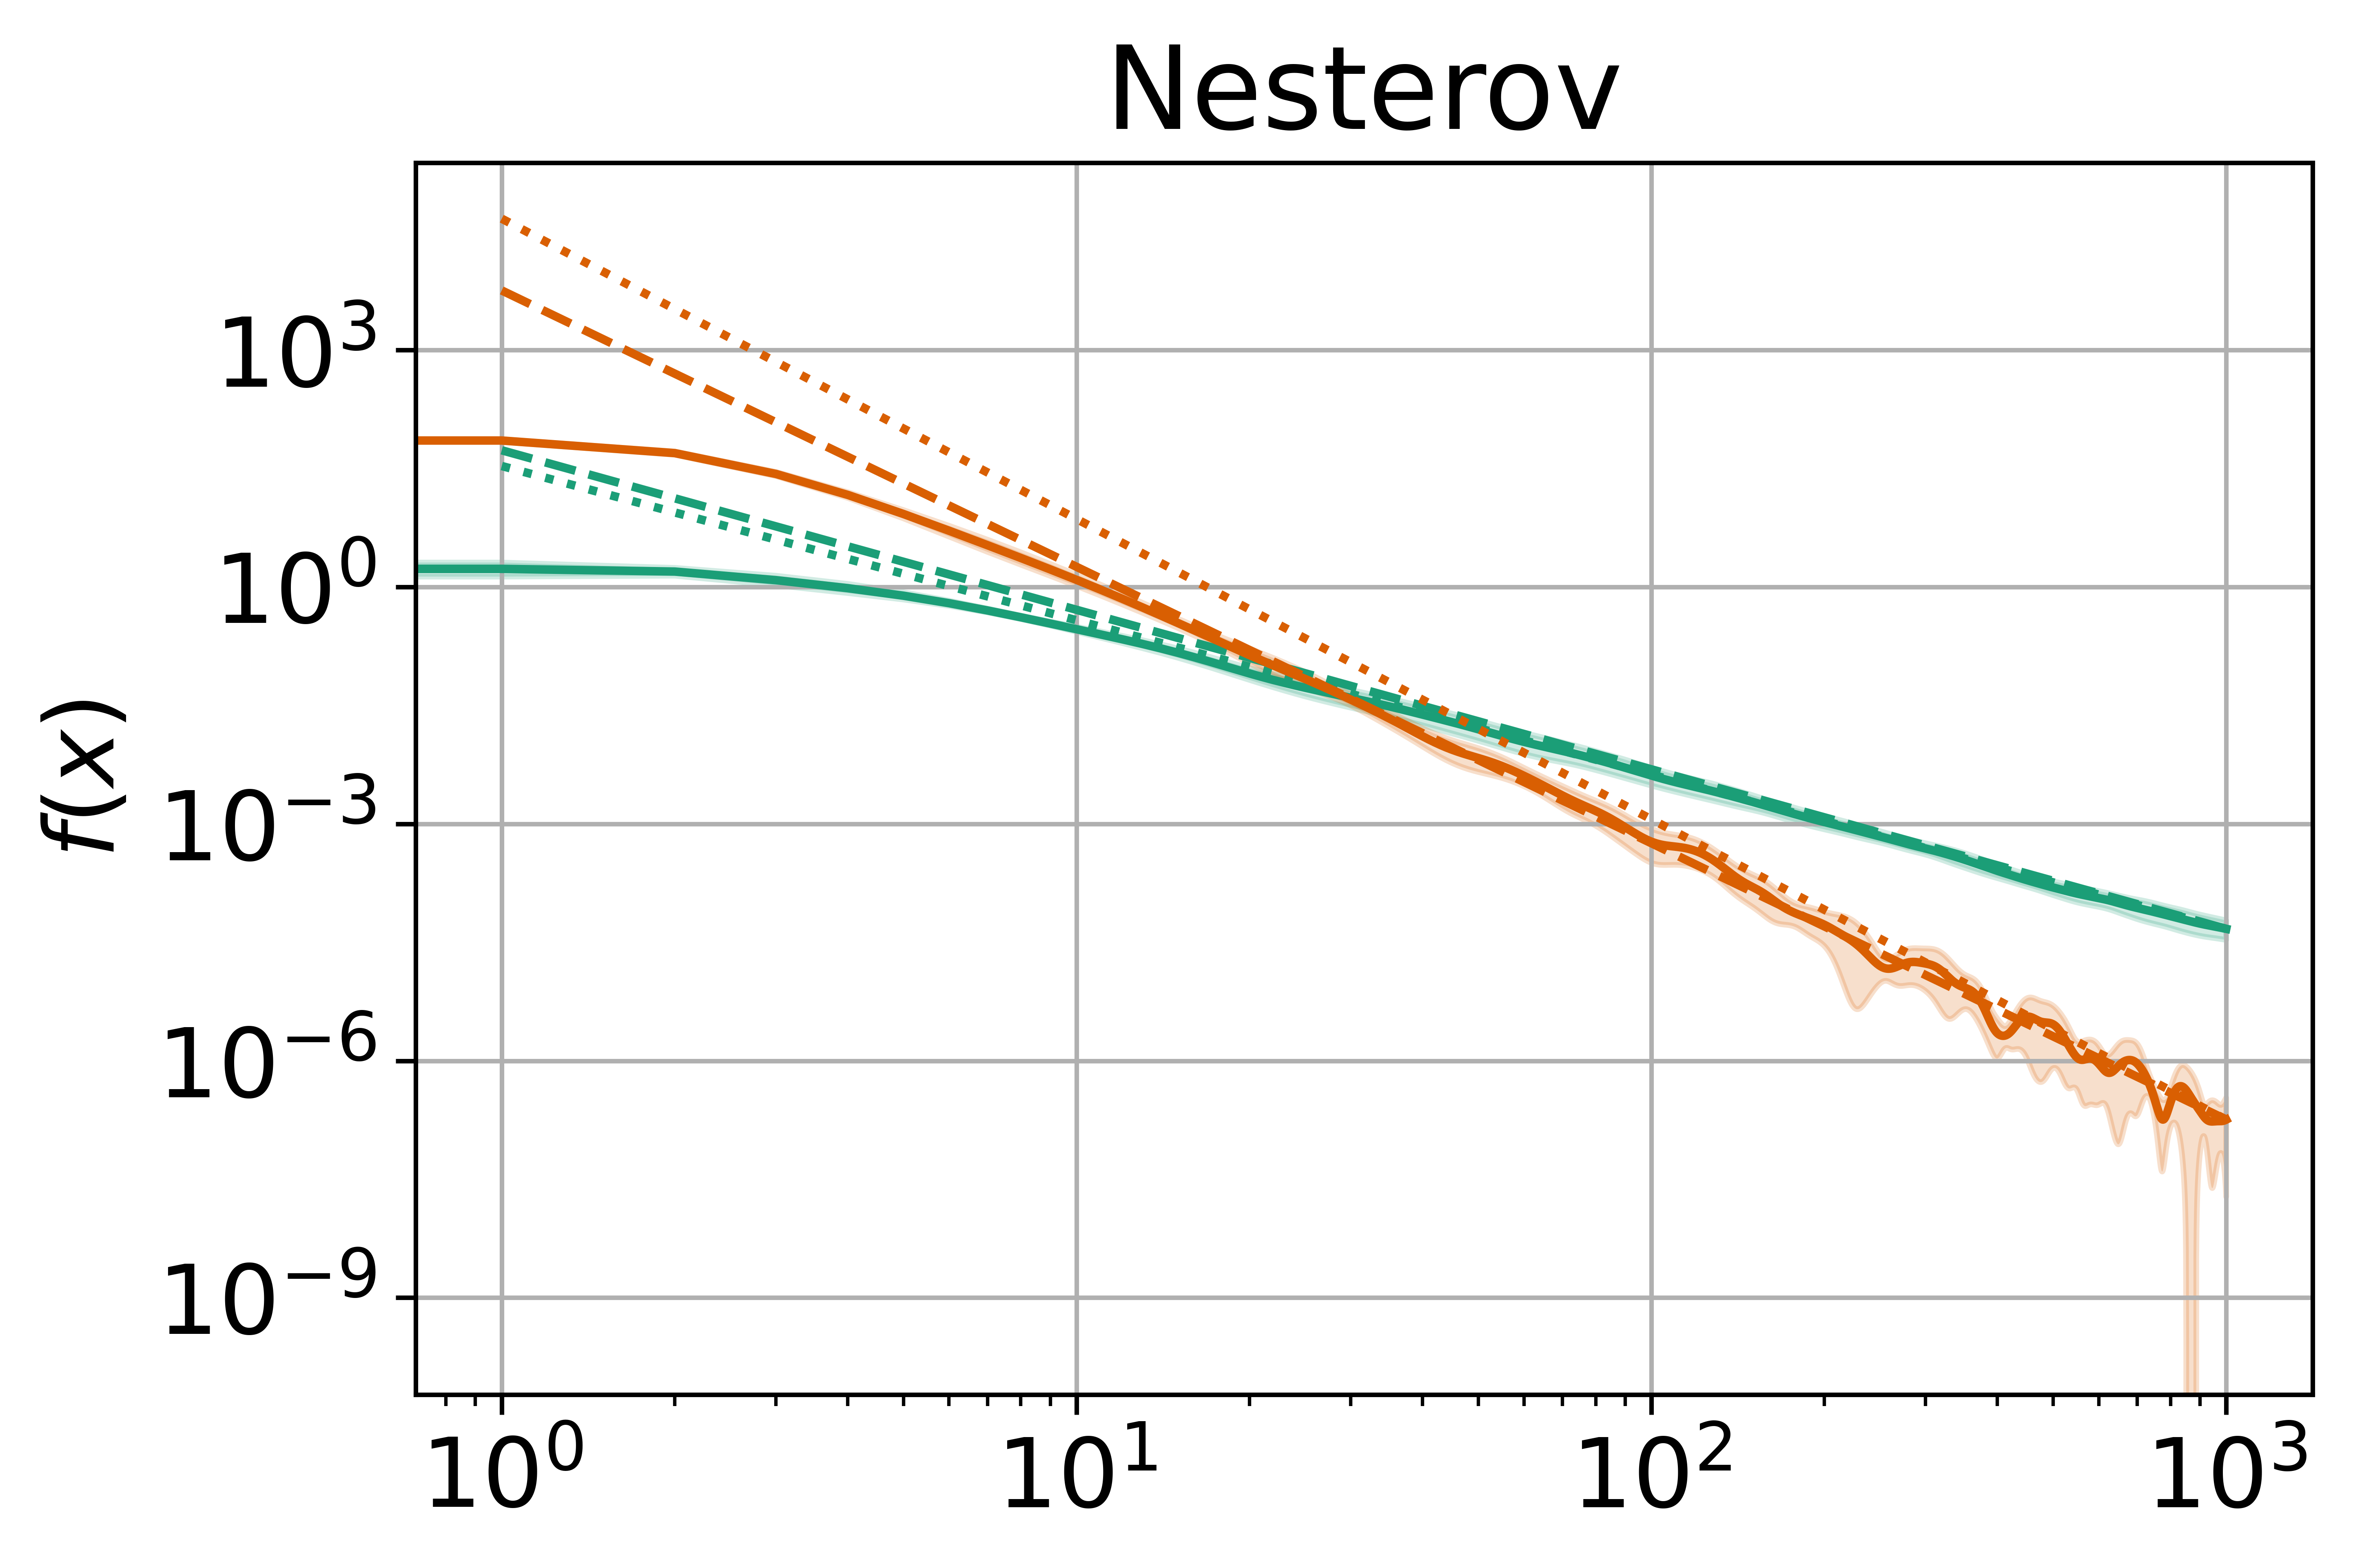

In [25]:
from matplotlib.lines import Line2D
def neste_assymp(xi):
    
    return 2*(xi+1) if xi<1/2 else (xi+5/2)

matplotlib.rcParams.update({'font.size': 17})
cm=plt.get_cmap('Dark2')
plt.figure(dpi=1000)
for idx_xi in [0,1]: #(idx_xi,xi),logs,coef in list(zip(enumerate(xis),D,coefs))[0]:
    #idx_xi=2
    xi,logs,coef=xis[idx_xi],D[idx_xi],coefs[idx_xi]
    m,s=logs.mean(0),logs.std(0)
    theo_coeff=neste_assymp(xi+1)
    print(theo_coeff)
    color=cm(idx_xi)
    label=r'$\xi=%.2f$' %xi
    plt.plot(np.array([1,niter]),np.array([m[-1]*(niter**theo_coeff),m[-1]]),'--',c=color)
    plt.plot(np.array([1,niter]),np.array([m[-1]*(niter**np.asarray(coef).mean()),m[-1]]),':',c=color)
    
    #plt.plot(np.array([1,niter]),np.array([m[-1]*(niter),m[-1]]),c='r')
    plt.plot(m,c=color,label=label)
    plt.fill_between(np.arange(niter+1),m-s,m+s,alpha=0.2,color=color)
    #plt.xlim(1000,niter)
    #plt.ylim(m[-1],m[-1]*((niter/1000)**theo_coeff))

manual = [Line2D([0], [0], color='k', linewidth=1, linestyle=ls,label=label) for ls,label in 
          zip(['-','--','dotted'],['Empirical','Theoretical Assymp.','Regression Assymp.'])]
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend(manual)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$f(x)$')
plt.yticks(10**np.arange(-9,4,3).astype(float))
#plt.legend(handles=handles,loc='lower left',prop={'size':12})
plt.grid()
plt.title('Nesterov')
plt.savefig('new_imgs/nesterov.pdf')
plt.show()


## Gradient Descent

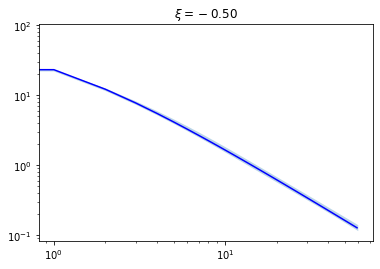

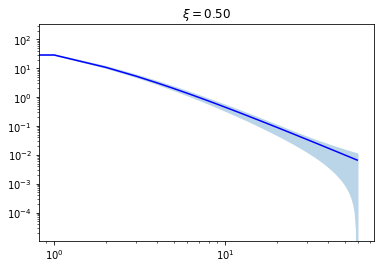

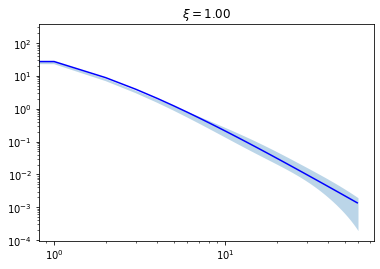

In [116]:
from scipy.special import gamma as fgamma
def gd_rates(t,xi,l,tau,L):
    norm=fgamma(xi+l+1)*fgamma(tau+1)/fgamma(xi+l+tau+2)
    it=fgamma(xi+l+1)*fgamma(2*t+tau+1)/fgamma(2*t+xi+l+tau+2)
    return L**l*norm*it
for xi in [-0.5,0.5,1]:
    niter=60
    logs=[]
    for _ in range(5):
        f=BetaQuadratic(xi=xi,n=600)
        log,_=gd(f,niter=niter)
        logs.append(log['f'])
    logs=np.asarray(logs)
    m,s=logs.mean(0),logs.std(0)
    plt.fill_between(np.arange(niter+1),m-s,m+s,alpha=0.3)
    theo=gd_rates(np.arange(niter),xi,1,1/2,f.L)
    plt.plot(np.arange(niter),theo*m[0]/theo[0],c='b')
    plt.xscale('log')
    plt.yscale('log')
    plt.title(r'$\xi=%.2f$'%xi)
    plt.show()


In [26]:
niter=1000


metric='f'
begin_idx=300
coefs=[]
D=[]
xis=[-0.99,-0.5,0] #np.linspace(-0.99,0.0.3)
#log,_=jacobi_moment(f,beta=3/2,niter=niter)
for idx_xi,xi in enumerate(xis):
    logs=[]
    c=[]
    for _ in range(4):
        f=BetaQuadratic(n=1500,xi=xi)
        log,_=gd(f,niter=niter)
        y=log[metric][begin_idx:]

        logs.append(log[metric])
        model=LinearRegression()

        logx=np.log(np.arange(begin_idx,niter+1).astype(float))
        model.fit(logx[:,None],np.log(y))
        #plt.plot(np.exp(logx),np.exp(model.predict(logx[:,None])))
        #plt.plot(np.exp(logx),m)
        c.append(float(-model.coef_))
    coefs.append(c)
    logs=np.asarray(logs)
    D.append(logs)


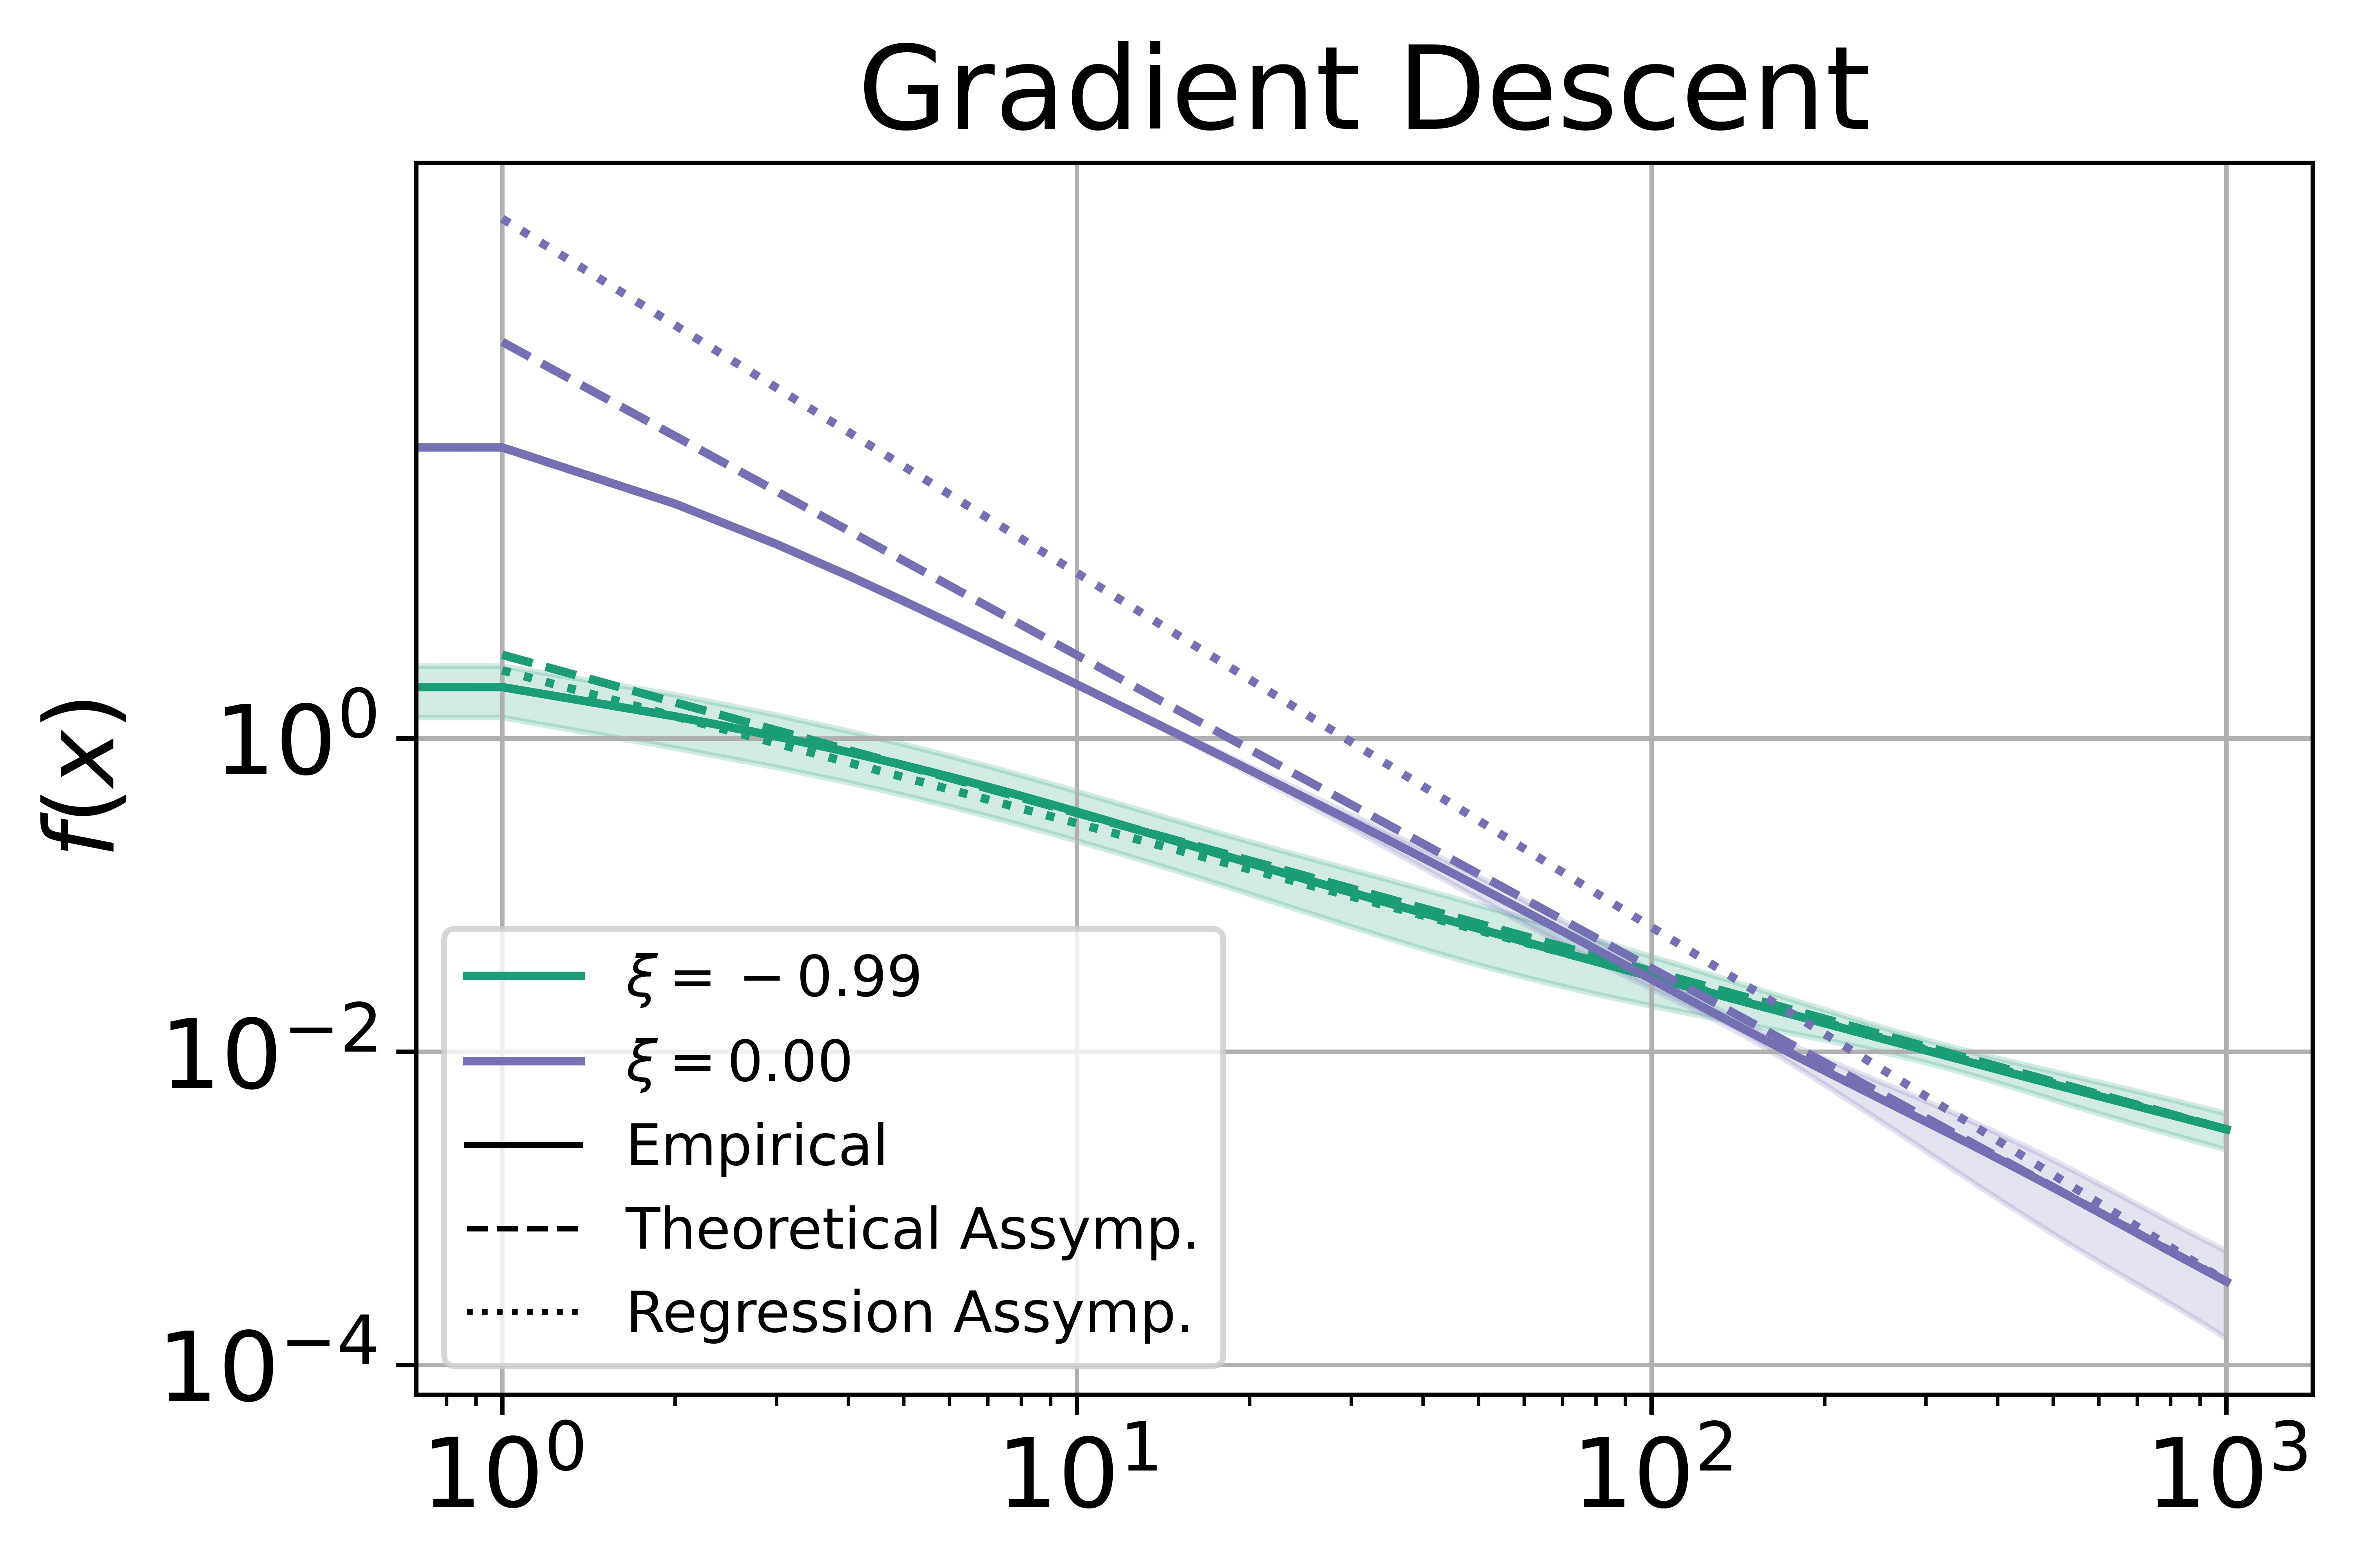

In [29]:
from matplotlib.lines import Line2D

cm=plt.get_cmap('Dark2')
plt.figure(dpi=1000)

    
for idx_xi in [0,2]: #(idx_xi,xi),logs,coef in list(zip(enumerate(xis),D,coefs))[0]:
    #idx_xi=2
    xi,logs,coef=xis[idx_xi],D[idx_xi],coefs[idx_xi]
    m,s=logs.mean(0),logs.std(0)
    theo_coeff=xi+2
    color=cm(idx_xi)
    label=r'$\xi=%.2f$' %xi
    plt.plot(np.array([1,niter]),np.array([m[-1]*(niter**theo_coeff),m[-1]]),'--',c=color)
    plt.plot(np.array([1,niter]),np.array([m[-1]*(niter**np.asarray(coef).mean()),m[-1]]),':',c=color)
    
    #plt.plot(np.array([1,niter]),np.array([m[-1]*(niter),m[-1]]),c='r')
    plt.plot(m,c=color,label=label)
    plt.fill_between(np.arange(niter+1),m-s,m+s,alpha=0.2,color=color)
    #plt.xlim(1000,niter)
    #plt.ylim(m[-1],m[-1]*((niter/1000)**theo_coeff))

manual = [Line2D([0], [0], color='k', linewidth=1, linestyle=ls,label=label) for ls,label in 
          zip(['-','--','dotted'],['Empirical','Theoretical Assymp.','Regression Assymp.'])]
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend(manual)
#plt.legend(lines, labels)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$f(x)$')
plt.yticks(10**np.arange(-4,2,2).astype(float))
plt.legend(handles=handles,loc='lower left',prop={'size':10})
plt.grid()
plt.title('Gradient Descent')
plt.savefig('new_imgs/gd.pdf')
plt.show()

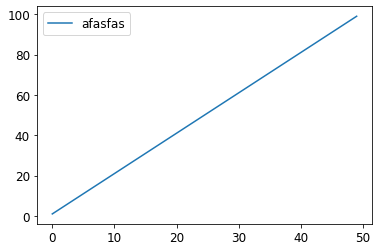

In [74]:
plt.plot(np.arange(1,100,2),label='afasfas')
plt.legend()

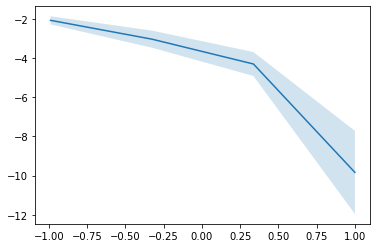

In [182]:
coefs=-np.asarray(coefs)
m,s=coefs.mean(1),coefs.std(1)
plt.fill_between(xis,m-s,m+s,alpha=0.2)
plt.plot(xis,m)

## Generalized Chebyshev

In [32]:
niter=1000


metric='f'
begin_idx=300
coefs=[]
D=[]
xis=[-0.99,-0.75,-0.5,-0.25,0] #np.linspace(-0.99,0.0.3)
#log,_=jacobi_moment(f,beta=3/2,niter=niter)
for idx_xi,xi in enumerate(xis):
    theo_coeff=xi+2
    logs=[]
    c=[]
    for _ in range(4):
        f=BetaQuadratic(n=1500,xi=xi)
        log,_=jacobi_momentum(f,niter=niter,alpha=0.5,beta=xi+2)
        y=log[metric][begin_idx:]

        logs.append(log[metric])
        model=LinearRegression()
    
        logx=np.log(np.arange(begin_idx,niter+1).astype(float))
        model.fit(logx[:,None],np.log(y))
        #plt.plot(np.exp(logx),np.exp(model.predict(logx[:,None])))
        #plt.plot(np.exp(logx),m)
        c.append(float(-model.coef_))
    coefs.append(c)
    logs=np.asarray(logs)
    D.append(logs)


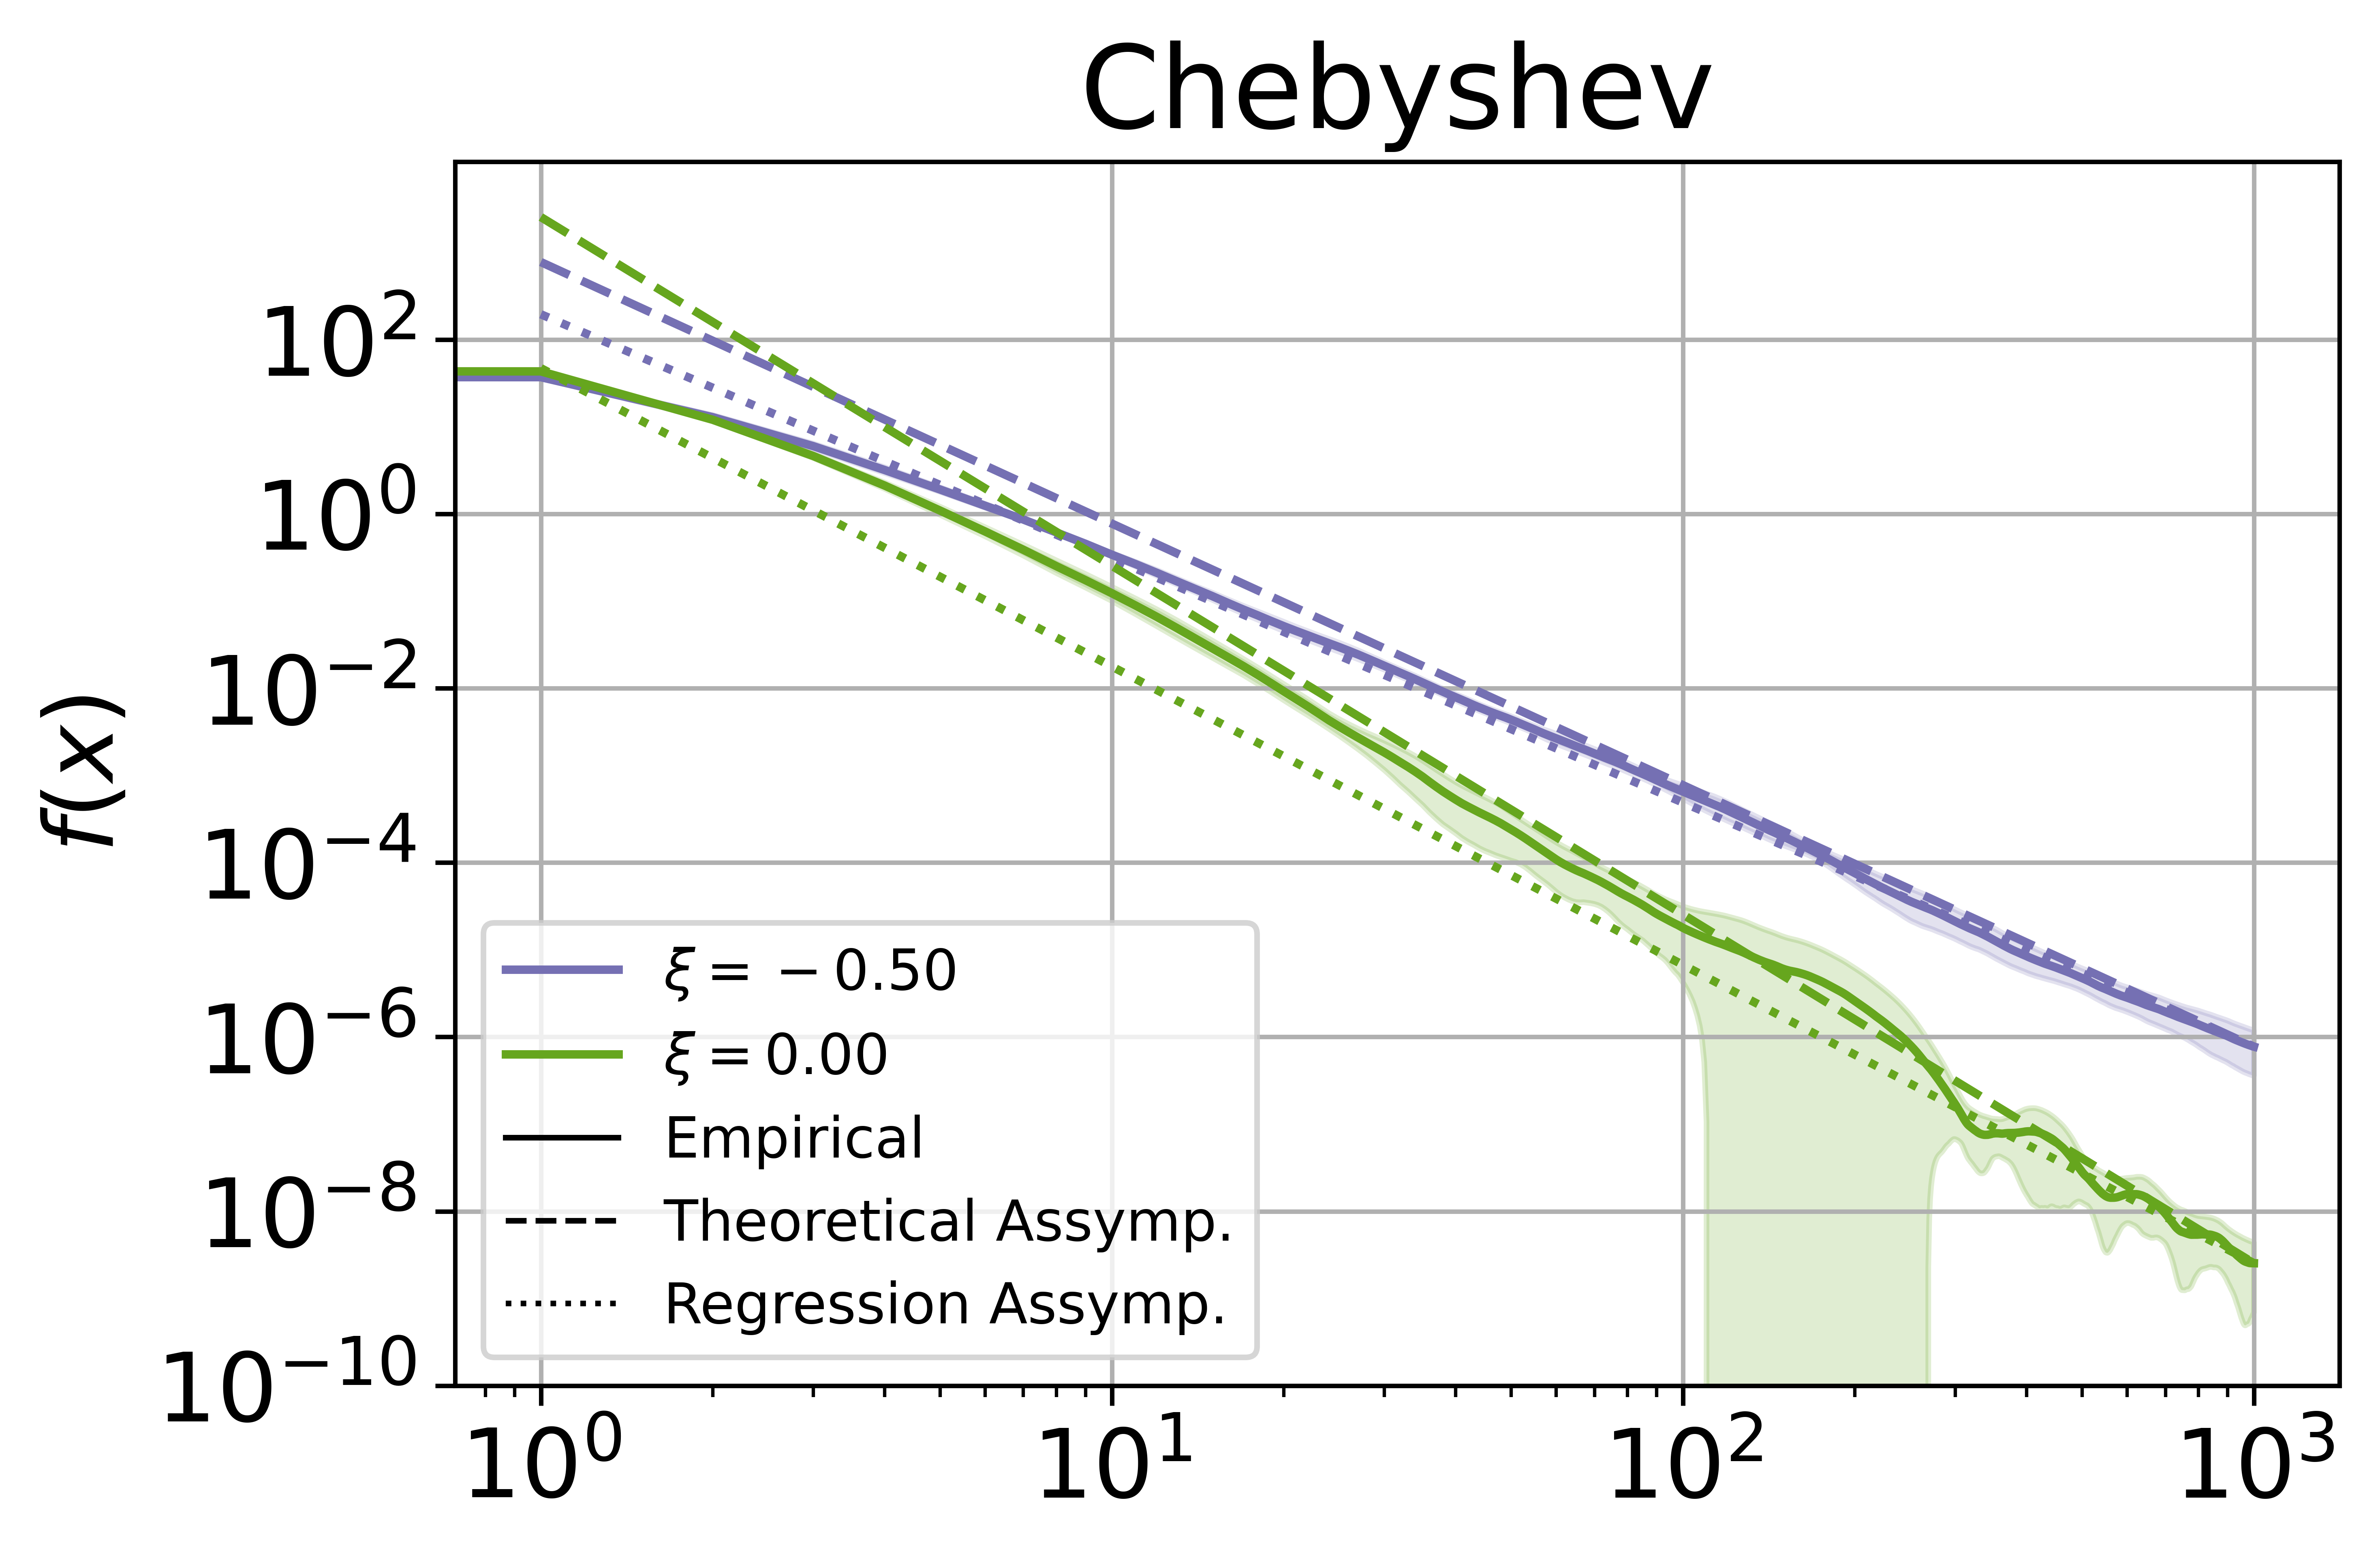

In [35]:
from matplotlib.lines import Line2D

cm=plt.get_cmap('Dark2')
plt.figure(dpi=1000)

    
for idx_xi in [2,4]: #(idx_xi,xi),logs,coef in list(zip(enumerate(xis),D,coefs))[0]:
    #idx_xi=2
    xi,logs,coef=xis[idx_xi],D[idx_xi],coefs[idx_xi]
    m,s=logs.mean(0),logs.std(0)
    theo_coeff=2*(xi+2)
    color=cm(idx_xi)
    label=r'$\xi=%.2f$' %xi
    plt.plot(np.array([1,niter]),np.array([m[-1]*(niter**theo_coeff),m[-1]]),'--',c=color)
    plt.plot(np.array([1,niter]),np.array([m[-1]*(niter**np.asarray(coef).mean()),m[-1]]),':',c=color)
    
    #plt.plot(np.array([1,niter]),np.array([m[-1]*(niter),m[-1]]),c='r')
    plt.plot(m,c=color,label=label)
    plt.fill_between(np.arange(niter+1),m-s,m+s,alpha=0.2,color=color)
    #plt.xlim(1000,niter)
    #plt.ylim(m[-1],m[-1]*((niter/1000)**theo_coeff))

manual = [Line2D([0], [0], color='k', linewidth=1, linestyle=ls,label=label) for ls,label in 
          zip(['-','--','dotted'],['Empirical','Theoretical Assymp.','Regression Assymp.'])]
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend(manual)
#plt.legend(lines, labels)
plt.xscale('log')
plt.yscale('log')
plt.legend(handles=handles,loc='lower left')
plt.title('Chebyshev')
plt.ylabel(r'$f(x)$')
plt.yticks(10**np.arange(-10,3,2).astype(float))
plt.legend(handles=handles,loc='lower left',prop={'size':10})
plt.grid()
plt.savefig('new_imgs/chebyshev.pdf')
plt.show()

## Numerical Instability

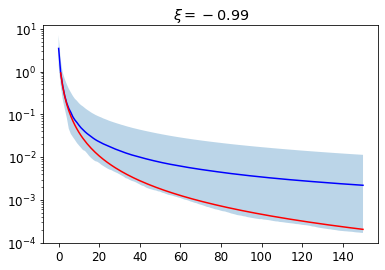

<ipython-input-9-538ec3501eea>:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return scipy.integrate.quad(aux,-1,1,maxp1=500)[0]


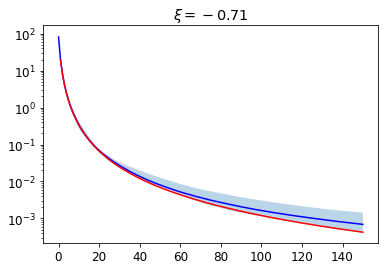

<ipython-input-9-538ec3501eea>:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return scipy.integrate.quad(aux,-1,1,maxp1=500)[0]


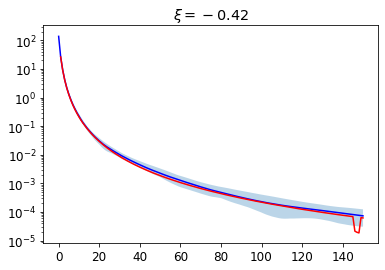

<ipython-input-9-538ec3501eea>:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return scipy.integrate.quad(aux,-1,1,maxp1=500)[0]


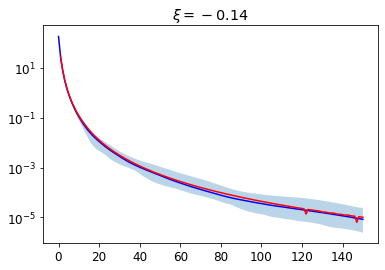

<ipython-input-9-538ec3501eea>:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return scipy.integrate.quad(aux,-1,1,maxp1=500)[0]


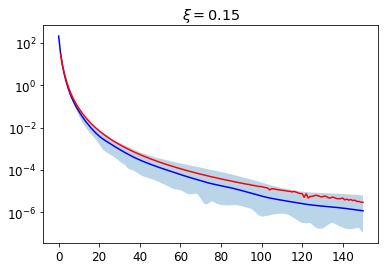

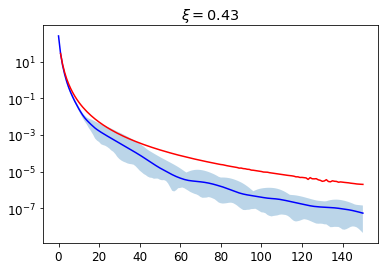

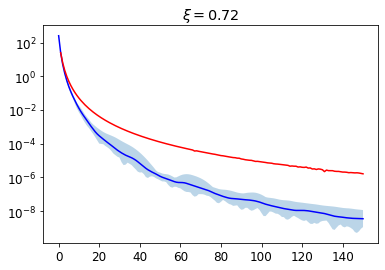

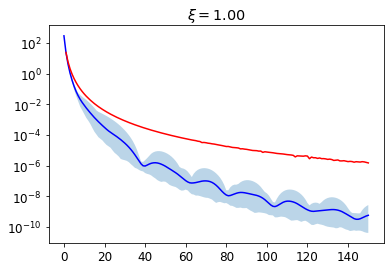

In [9]:
from scipy.special import gamma as fgamma
from scipy.special import eval_jacobi
x0=np.linspace(-1,1,300)
def chebyshev_rates(t,xi,tau,alpha,beta,l):
    def aux(x):
        p=eval_jacobi(t,alpha,beta,x)/eval_jacobi(t,alpha,beta,-1)
        return p**2*(1-x)**tau*(1+x)**(xi+l)
    return scipy.integrate.quad(aux,-1,1,maxp1=500)[0]
niter=150
alpha,beta=1/2,3/2
xi,tau=-0.5,1/2
for xi in np.linspace(-0.99,1,8):
    
    theo=np.asarray([chebyshev_rates(t,xi,tau,alpha,beta,l=1) for t in range(1,niter+1)])
    logs=[]

    for _ in range(10):
        f=BetaQuadratic(n=1000,tau=tau,xi=xi)
        log,_=jacobi_momentum(f,alpha,xi+2,niter=niter)
        logs.append(log['f'])
    logs=np.asarray(logs)
    m,s=logs.mean(0),logs.std(0)
    plt.fill_between(np.arange(niter+1),logs.min(0),logs.max(0),alpha=0.3)
    plt.plot(m,c='b')
    plt.plot(np.arange(1,niter+1),theo*m[1]/theo[0],c='r')
    plt.yscale('log')
    plt.title(r'$\xi=%.2f$'%xi)
    plt.show()


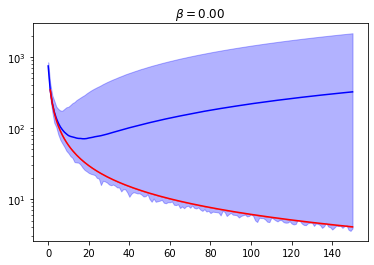

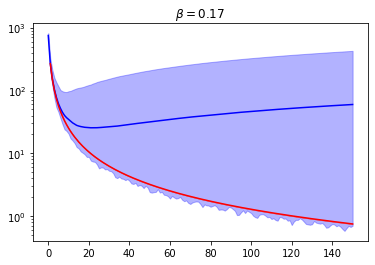

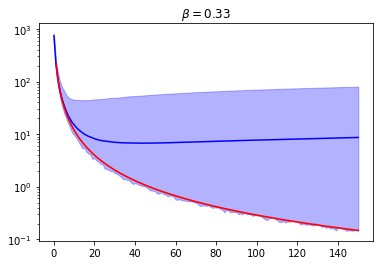

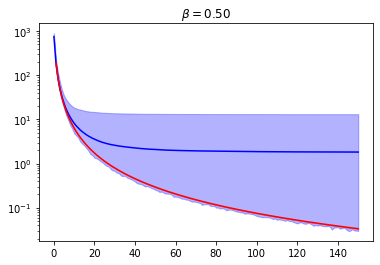

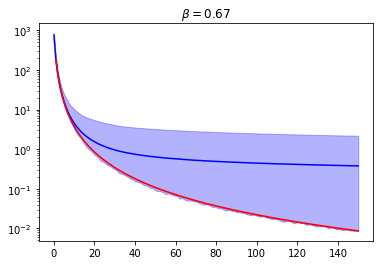

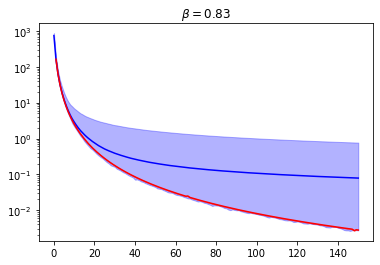

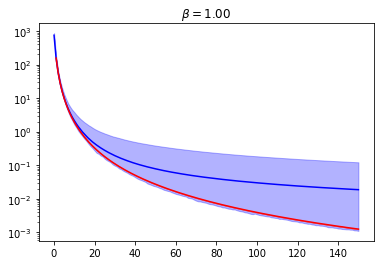

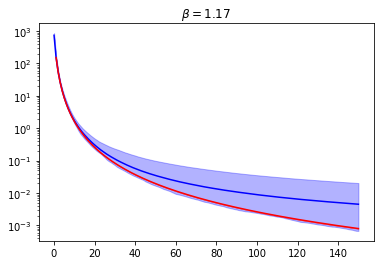

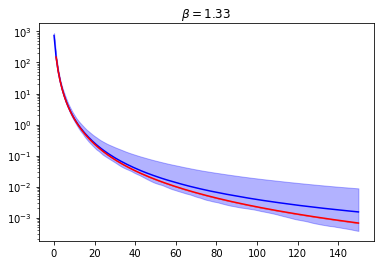

<ipython-input-63-b1e6efb3c958>:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return scipy.integrate.quad(aux,-1,1,limit=1500)


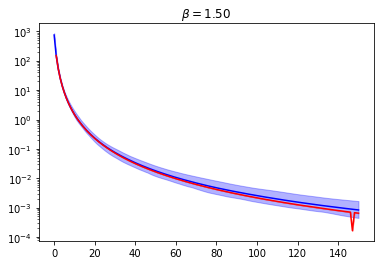

In [63]:
from scipy.special import gamma as fgamma
from scipy.special import eval_jacobi
x0=np.linspace(-1,1,300)
def chebyshev_rates(t,xi,tau,alpha,beta,l):
    def aux(x):
        p=eval_jacobi(t,alpha,beta,x)/eval_jacobi(t,alpha,beta,-1)
        return p**2*(1-x)**tau*(1+x)**(xi+l)
    return scipy.integrate.quad(aux,-1,1,limit=1500)
niter=150
alpha,beta=1/2,3/2
xi,tau=-0.5,1/2
for beta in np.linspace(0.0,1.5,2):
    
    aux=[chebyshev_rates(t,xi,tau,alpha,beta,l=1) for t in range(1,niter+1)]
    theo,err=np.asarray([t[0] for t in aux]),np.asarray([t[1] for t in aux])
    logs=[]

    for _ in range(1):
        f=RandomQuadratic(n=1500)
        log,_=jacobi_momentum(f,alpha,beta,niter=niter)
        logs.append(log['f'])
    logs=np.asarray(logs)
    m,s=logs.mean(0),logs.std(0)
    plt.fill_between(np.arange(niter+1),logs.min(0),logs.max(0),alpha=0.3,color='b')
    plt.plot(m,c='b')
    
    plt.fill_between(np.arange(1,niter+1),(theo-err)*m[1]/theo[0],(theo+err)*m[1]/theo[0],color='r',alpha=0.3)
    plt.plot(np.arange(1,niter+1),theo*m[1]/theo[0],color='r')
    plt.yscale('log')
    plt.title(r'$\beta=%.2f$'%beta)
    plt.show()


In [ ]:
def rates(xi,tau,alpha,beta):
    if alpha<tau+1/2 and beta<xi+1/2:
        return -1-2*beta
    if alpha==tau+1/2 and beta==xi+1/2:
        return -2*(xi+1)
    return 2*(max(alpha-beta-tau,-xi)-1)

begin_idx=100
k=2
niter=500
xis=np.linspace(-0.99,1,20)

tags=['optimum','beta = 5','nesterov','gd']
slopes=[[] for _ in tags]
for xi  in xis:
    m=np.zeros(niter+1)
    logs=[[] for _ in range(len(tags))]
    for _ in range(k):
        f=BetaQuadratic(a=xi+1,b=3/2,n=1000)
        for m,l in zip([jm_decorator(1/2,xi+1),jm_decorator(1/2,5),nesterov,gd],logs):
            log,_=m(f,niter=niter)
            l.append(list(log['f']))
    logs=np.asarray(logs)
    
    for l,clist,tag in zip(logs.transpose(1,0,2),slopes,tags):
        m,std=l.mean(0),l.std(0)
        plt.fill_between(np.arange(len(m)),l.min(0),l.max(0),alpha=0.2,label=tag)
        plt.title(str(xi))
        plt.yscale('log')
        plt.legend()
        plt.show()
    
    
        model=LinearRegression()

        logx=np.log(np.arange(begin_idx,niter+1).astype(float))
        model.fit(logx[:,None],np.log(m)[begin_idx:,None])
        clist.append(model.coef_)
    


In [15]:
plt.title()

TypeError: title() missing 1 required positional argument: 'label'

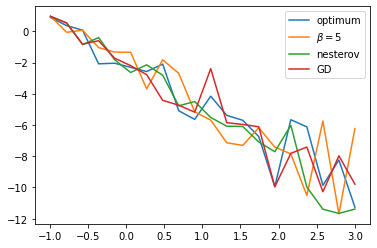

In [17]:
tags=['optimum',r'$\beta = 5$','nesterov','GD']


for slope,tag in zip(slopes,tags):
    plt.plot(xis,np.array(slope).reshape(-1),label=tag)

    
    plt.legend()